In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
class A:
    def __init__(self,problem):
        self.problem = problem
        
    def an(self,n):
        if(n == 0):
            if(self.problem == 1):
                return 0
            elif(self.problem == 2):
                return np.power(np.pi,2)/3
            elif(self.problem == 3):
                return 0   
        else: 
            if(self.problem == 1):
                return (np.complex(0,1)/n)*np.power(-1,n,dtype = float)
            if(self.problem == 2):
                return 2*(np.power(-1,n,dtype=float))/np.power(n,2)
            if(self.problem == 3):
                return (10*np.complex(0,1)/(n*np.pi))*(np.power(-1,n,dtype = float) - 1)  
                #return -1*5*np.complex(0,1)*np.exp(-1*np.complex(0,1)*n*np.pi)*np.power((-1 + np.exp(np.complex(0,1)*np.pi*n)),2  )/(np.pi*n)
    
    def plot(self,Period):
        
        N_list = [1,2,4,8,16,32]
        rows = 3
        cols = 2
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
        
        for i in range(rows):
            for j in range(cols):
                N = N_list[i*cols + j]
                X_point = np.linspace(-Period,Period,50)
                if(self.problem == 1):
                    Y_true = X_point
                elif(self.problem == 2):
                    Y_true = np.square(X_point)
                elif(self.problem == 3):
                    Y_true = np.zeros(len(X_point))
                    Y_true[X_point >= 0] =  2*Period
                    Y_true[X_point < 0 ] = -2*Period
                ax[i][j].plot(X_point,Y_true)

                Y_cal = np.zeros(len(X_point))
                temp = np.zeros(len(X_point))
                for n in range(-N,N+1):
                    temp = self.an(n)*np.exp(np.complex(0,1)*n*X_point*np.pi/Period)
                    np.add(Y_cal, temp, out=Y_cal, casting='unsafe')
                ax[i][j].plot(X_point,Y_cal)
                ax[i][j].set_xlabel("Interval")
                ax[i][j].set_ylabel("Function Value")
                ax[i][j].set_title("For N : " + str(-1*N) + " to " + str(N))
        
        plt.savefig(str(self.problem))

## Problem A
### Part A

C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part


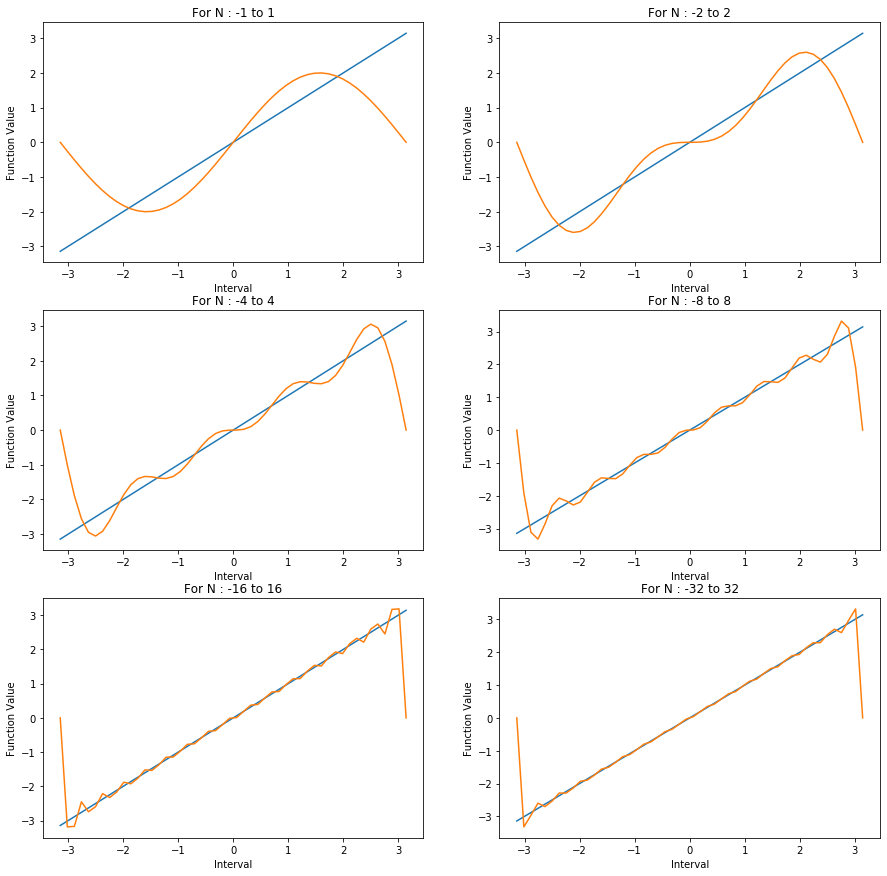

In [90]:
Problem1_a = A(1)
Problem1_a.plot(np.pi)

### Part B

C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part


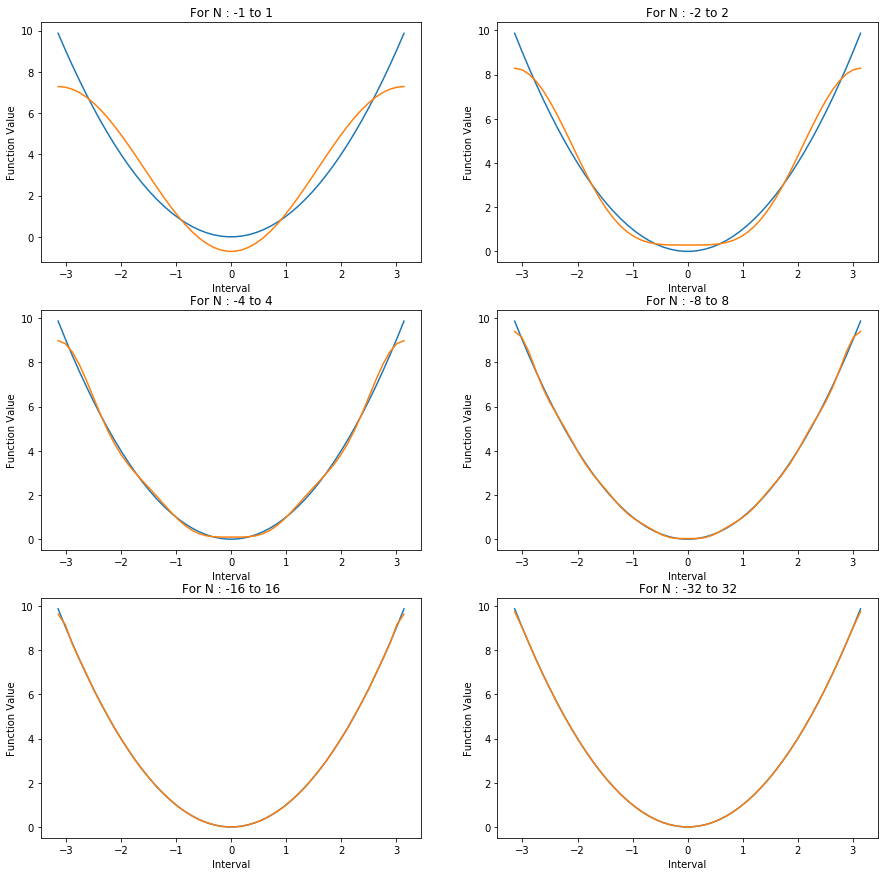

In [91]:
Problem1_b = A(2)
Problem1_b.plot(np.pi)

### Part C

C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part


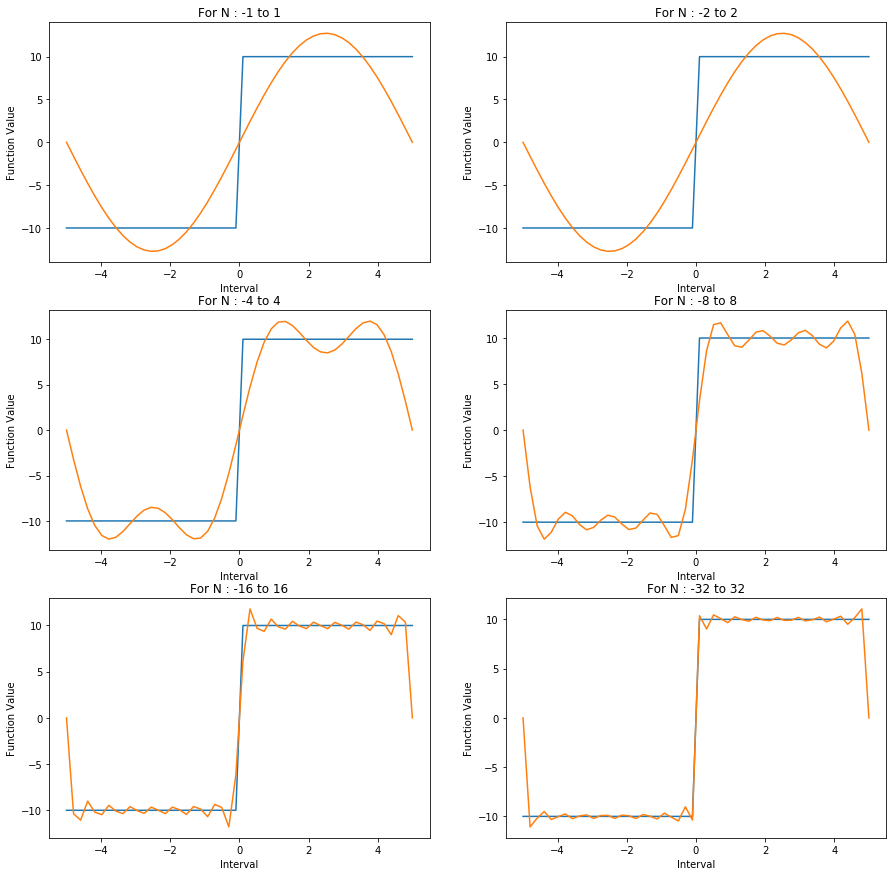

In [92]:
Problem1_c = A(3)
Problem1_c.plot(5)

## Problem 2

In [121]:
class PLOT:
    def __init__(self,name):
        self.name = name
        
    def show(self):
        temp = np.loadtxt(self.name)
        grid = temp[:,0]
        #grid = grid[:-1]
        fun_val = temp[:,1]
        #fun_val = fun_val[:-1]
        y_DFT = np.sqrt(np.power(temp[:,2],2) + np.power(temp[:,3],2))
        #y_DFT = y_DFT[:-1]
        x_inver_fft_real = temp[:,4]
        #x_inver_fft_real = x_inver_fft_real[:-1]
        x_inver_fft_imag = temp[:,5]
        #x_inver_fft_imag = x_inver_fft_imag[:-1]
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
        #To plot DFT
        ax1.plot(fun_val,y_DFT,'-gD')
        ax1.set_xlabel('function val')
        ax1.set_ylabel('DFT value')
        ax1.set_title('For n=' +str(2*len(fun_val)))
        #To plot FFT and Function
        ax2.plot(grid,fun_val,marker=11,label = 'True data')
        ax2.plot(grid,x_inver_fft_real,marker=2,label = 'Inverse FFT data')
        ax2.set_xlabel('Grid_data(from 0 to ' r'$\pi$)')
        ax2.set_ylabel('Function_value')
        ax2.set_title('For n=' +str(2*len(fun_val)))
        ax2.legend()
        temp = str(list(self.name)[0] + list(self.name)[1])
        plt.savefig(temp)

### Part 1 

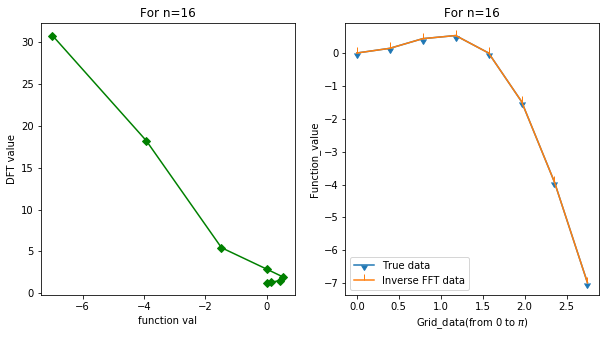

In [122]:
P2_1 = PLOT("16.txt")
P2_1.show()

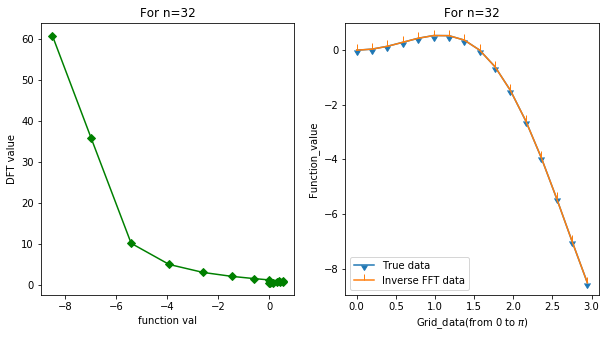

In [123]:
P2_2 = PLOT("32.txt")
P2_2.show()

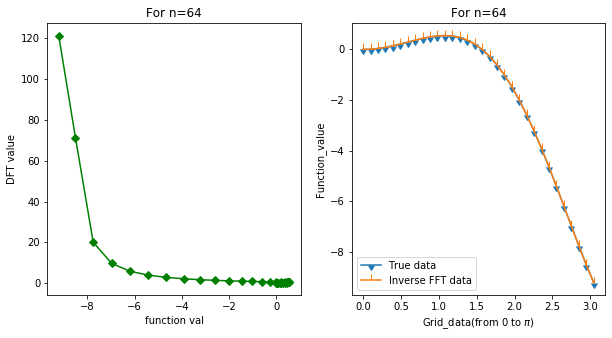

In [124]:
P2_2 = PLOT("64.txt")
P2_2.show()

### Part 2

In [138]:
class Plot_problem:
    def __init__(self,name1,name2):
        self.name1 = name1
        self.name2 = name2
    
        
    def show(self,name,index):
        results   =   np.loadtxt(name)
        grid_data =   results[:,0]
        fun_value =   results[:,1]
        DFT_real  =   results[:,2]
        DFT_imag  =   results[:,3]
        #Time Interval
        T = grid_data[1] - grid_data[0]
        N = DFT_real.size
        #Frequency
        f = np.linspace(0, 1 / T, N)
        
        plt.ylabel("Amplitude")
        plt.xlabel("Frequency [Hz]")
        
        plt.bar(f[:N // 2], np.sqrt(np.power(DFT_real,2) + np.power(DFT_imag,2))[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor        
        plt.savefig(str(index))
        plt.show()
                
    def Show(self):
        self.show(self.name1,'without noise')
        self.show(self.name2,'with noise')
        results   =   np.loadtxt(self.name1)
        grid_data =   results[:,0]
        fun_value =   results[:,1]
        plt.plot(grid_data,fun_value,label="Without Noise")
        results   =   np.loadtxt(self.name2)
        grid_data =   results[:,0]
        fun_value =   results[:,1]
        plt.plot(grid_data,fun_value,label = "With Noise")
        plt.xlabel('Points or Grid')
        plt.ylabel('Function Value')
        plt.legend()
        plt.savefig('amplitude')
        

In [139]:
P_2 = Plot_problem('problem_2_a.txt','problem_2_b.txt')

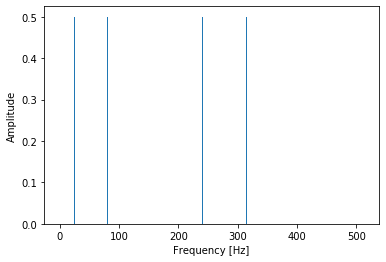

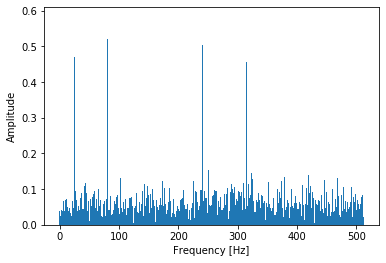

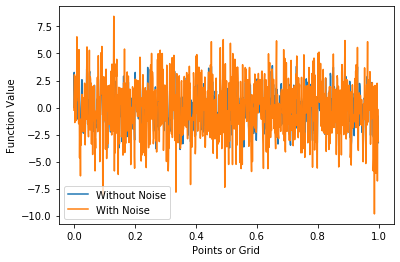

In [140]:
P_2.Show()